## Classification of HODA Dataset with KNN

In [3]:
from matplotlib import pyplot as plt
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_cdb('./DigitDB/Train 60000.cdb')
print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_cdb('./DigitDB/Test 20000.cdb')
print('Reading RemainingSamples.cdb ...')
remaining_images, remaining_labels = read_hoda_cdb('./DigitDB/RemainingSamples.cdb')
print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)
print('Reading remaining samples dataset (RemainingSamples.cdb)...')
X_remaining, Y_remaining = read_hoda_dataset('./DigitDB/RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=True,
                                             reshape=True)

print('\n\nReading the dataset is completed')

Reading Train 60000.cdb ...
Reading Test 20000.cdb ...
Reading RemainingSamples.cdb ...
Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...
Reading remaining samples dataset (RemainingSamples.cdb)...


Reading the dataset is completed


### We Must Work on these :

X_train , X_test , X_remaining

Y_train, Y_test , Y_remaining

In [4]:
print('X_train (Images) shape  :',X_train.shape,'----->','Must Reshape to (32,32)')
print('Y_train (Labels) shape :',Y_train.shape)
print('------------')
print('X_test (Images) shape  :',X_test.shape)
print('Y_test (Labels) shape :',Y_test.shape)
print('------------')
print('X_remaining (Images) shape :',X_remaining.shape,'----->','Must Reshape to (32,32)')
print('Y_remaining (Labels) shape :',Y_remaining.shape)


X_train (Images) shape  : (60000, 1024) -----> Must Reshape to (32,32)
Y_train (Labels) shape : (60000,)
------------
X_test (Images) shape  : (20000, 32, 32, 1)
Y_test (Labels) shape : (20000, 10)
------------
X_remaining (Images) shape : (22352, 1024) -----> Must Reshape to (32,32)
Y_remaining (Labels) shape : (22352, 10)


### Importing Libraries

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

X_train & Y_train Samples

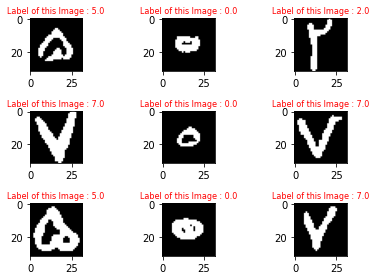

In [6]:
for i in range (1,10):
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.title('Label of this Image : '+str(Y_train[i]),pad=5,color='red',fontsize=8)
    plt.imshow((X_train[i].reshape(32,32)),cmap='gray')

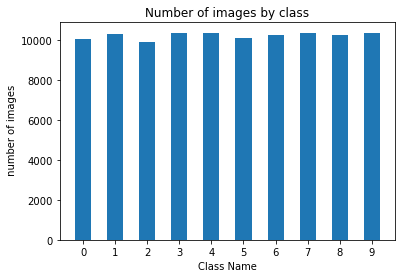

In [7]:
#EDA Part
#Identifying Class Imbalance (dataset paper informations used)
#number of images in each class in dataset
number_classes = {'0':10070, '1':10330, '2':9923, '3':10334, '4':10333,
                  '5':10110, '6':10254, '7':10363, '8':10264, '9':10371}

plt.bar(number_classes.keys(), number_classes.values(), width=0.5)
plt.title("Number of images by class")
plt.xlabel('Class Name')
plt.ylabel(' number of images')

plt.show()

In [8]:
#EDA part
#train datas informations like type, data type, min, max, shape
# we consider i=4 sample in train

print('*************** all train images ****************')
print('\n')
print('X_train type:',type(X_train))
print('X_train data type:',X_train.dtype)
print('X_train data shape:',X_train.shape)
print('*************** one specific train image **************')
print('\n')
print('X_train[i] type:',type(X_train[4]))
print('X_train[i] data type:',X_train[4].dtype)
print('X_train[i] min:',X_train[4].min())
print('X_train[i] max:',X_train[4].max())
print('X_train[i] shape:',X_train[4].shape)
print('*************** all train labels *************')
print('\n')
print('Y_train type:',type(Y_train))
print('Y_train data type:',Y_train.dtype)
print('Y_train data shape:',Y_train.shape)
print('*************** one specific train label  *************')
print('\n')
print('Y_tain[i] type:', type(Y_train[4]))
print('Y_train[i] data type:', Y_train[4].dtype)
print('Y_trian[i] when one_hot=False:', Y_train[4])

*************** all train images ****************


X_train type: <class 'numpy.ndarray'>
X_train data type: float32
X_train data shape: (60000, 1024)
*************** one specific train image **************


X_train[i] type: <class 'numpy.ndarray'>
X_train[i] data type: float32
X_train[i] min: 0.0
X_train[i] max: 1.0
X_train[i] shape: (1024,)
*************** all train labels *************


Y_train type: <class 'numpy.ndarray'>
Y_train data type: float32
Y_train data shape: (60000,)
*************** one specific train label  *************


Y_tain[i] type: <class 'numpy.float32'>
Y_train[i] data type: float32
Y_trian[i] when one_hot=False: 7.0


In [9]:
#EDA part
#test datas informations like type, data type, min, max, shape
# we consider i=4 sample in test

print('----------------- all test images -----------------------')
print('\n')
print('X_test type:',type(X_test))
print('X_test data type:',X_test.dtype)
print('X_test data shape:',X_test.shape)
print('------------------- one specific test image -----------------------')
print('\n')
print('X_test[i] type:',type(X_test[4]))
print('X_test[i] data type:',X_test[4].dtype)
print('X_test[i] min:',X_test[4].min())
print('X_test[i] max:',X_test[4].max())
print('X_test[i] shape:',X_test[4].shape)
print('------------------- all test labels --------------------')
print('\n')
print('Y_test type:',type(Y_test))
print('Y_test data type:',Y_test.dtype)
print('Y_test data shape:',Y_test.shape)
print('--------------------- one specific test label --------------------')
print('\n')
print('Y_test[i] type:', type(Y_test[4]))
print('Y_test[i] data type:', Y_test[4].dtype)
print('Y_test[i] when one_hot=False:', Y_test[4])

----------------- all test images -----------------------


X_test type: <class 'numpy.ndarray'>
X_test data type: float32
X_test data shape: (20000, 32, 32, 1)
------------------- one specific test image -----------------------


X_test[i] type: <class 'numpy.ndarray'>
X_test[i] data type: float32
X_test[i] min: 0.0
X_test[i] max: 1.0
X_test[i] shape: (32, 32, 1)
------------------- all test labels --------------------


Y_test type: <class 'numpy.ndarray'>
Y_test data type: float32
Y_test data shape: (20000, 10)
--------------------- one specific test label --------------------


Y_test[i] type: <class 'numpy.ndarray'>
Y_test[i] data type: float32
Y_test[i] when one_hot=False: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
#EDA part
#remaining datas informations like type, data type, min, max, shape
# we consider i=4 sample in remaining

print('/////////////////// all remaining images ////////////////////')
print('\n')
print('X_remaining type:',type(X_remaining))
print('X_remaining data type:',X_remaining.dtype)
print('X_remaining data shape:',X_remaining.shape)
print('/////////////////// one specific remaining image ///////////////////')
print('\n')
print('X_remaining[i] type:',type(X_remaining[4]))
print('X_remaining[i] data type:',X_remaining[4].dtype)
print('X_remaining[i] min:',X_remaining[4].min())
print('X_remaining[i] max:',X_remaining[4].max())
print('X_remaining[i] shape:',X_remaining[4].shape)
print('////////////////// all remaining labels //////////////////')
print('\n')
print('Y_remaining type:',type(Y_remaining))
print('Y_remaining data type:',Y_remaining.dtype)
print('Y_remaining data shape:',Y_remaining.shape)
print('/////////////////// one specific remaining label ///////////////////')
print('\n')
print('Y_remaining[i] type:', type(Y_remaining[4]))
print('Y_remaining[i] data type:', Y_remaining[4].dtype)
print('Y_remaining[i] when one_hot=False:', Y_remaining[4])

/////////////////// all remaining images ////////////////////


X_remaining type: <class 'numpy.ndarray'>
X_remaining data type: float32
X_remaining data shape: (22352, 1024)
/////////////////// one specific remaining image ///////////////////


X_remaining[i] type: <class 'numpy.ndarray'>
X_remaining[i] data type: float32
X_remaining[i] min: 0.0
X_remaining[i] max: 1.0
X_remaining[i] shape: (1024,)
////////////////// all remaining labels //////////////////


Y_remaining type: <class 'numpy.ndarray'>
Y_remaining data type: float32
Y_remaining data shape: (22352, 10)
/////////////////// one specific remaining label ///////////////////


Y_remaining[i] type: <class 'numpy.ndarray'>
Y_remaining[i] data type: float32
Y_remaining[i] when one_hot=False: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


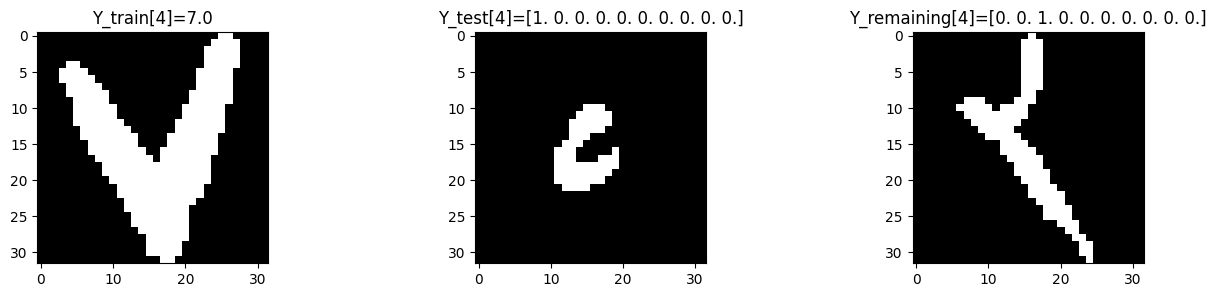

In [28]:
#EDA part
#show some image samples
# we consider i=4 samples in train, test and remaining

fig = plt.figure(figsize=(16, 3))
fig.add_subplot(1,3,1)
plt.title('Y_train[4]=' + str(Y_train[4]))
plt.imshow(X_train[4].reshape([32,32]), cmap='gray')

fig.add_subplot(1,3,2)
plt.title('Y_test[4]=' + str(Y_test[4]))
plt.imshow(X_test[4].reshape([32,32]), cmap='gray')

fig.add_subplot(1,3,3)
plt.title('Y_remaining[4]=' + str(Y_remaining[4]))
plt.imshow(X_remaining[4].reshape([32,32]), cmap='gray')

plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=3, weights='distance')